In [185]:
import pandas as pd 
import numpy as mp
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
#load the data set 
#analyse the dataset 
#handle the nulll values 
#handle the categorical values
#find a correalation
#using the correalation use correct model 
#check the accuracy 

In [187]:
#1 Load the dataset 
pd.options.display.max_seq_items = 2000
df=pd.read_csv('traintit.csv')

In [188]:
df.shape

(891, 12)

In [189]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [192]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [193]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

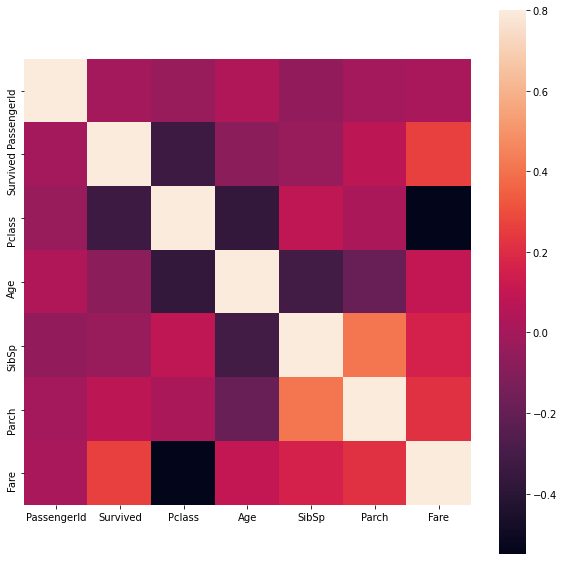

In [117]:
corrmat=df.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corrmat,vmax= .8, square=True)
plt.show()

In [194]:
df['Age']=df['Age'].fillna(df['Age'].mean())


In [195]:
df.drop(['Cabin'],axis=1,inplace=True)

In [196]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode())

In [197]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [198]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [199]:

dum=pd.get_dummies(df.Sex)

In [200]:
dum

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [201]:
dfmerg=pd.concat([df,dum],axis=1)

In [202]:
dfmerg=dfmerg.drop(['Sex','male'],axis=1)

In [203]:
dfmerg

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female
0,1,0,3,22.000000,1,0,7.2500,S,0
1,2,1,1,38.000000,1,0,71.2833,C,1
2,3,1,3,26.000000,0,0,7.9250,S,1
3,4,1,1,35.000000,1,0,53.1000,S,1
4,5,0,3,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,0
887,888,1,1,19.000000,0,0,30.0000,S,1
888,889,0,3,29.699118,1,2,23.4500,S,1
889,890,1,1,26.000000,0,0,30.0000,C,0


In [204]:
dum2=pd.get_dummies(dfmerg.Embarked)

In [205]:
dum2

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [206]:
dfmerg2=pd.concat([dfmerg,dum2],axis=1)

In [207]:
dfmerg2=dfmerg2.drop(['Embarked','C'],axis=1)

In [208]:
dfmerg2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,1,0,3,22.000000,1,0,7.2500,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,1
889,890,1,1,26.000000,0,0,30.0000,0,0,0


In [209]:
training_Feat=['Pclass','Age','SibSp','Parch','Fare','female','Q','S']

In [210]:

Y=['Survived']

In [211]:

dfmerg2[training_Feat].shape

(891, 8)

In [212]:
dfmerg2[Y].shape

(891, 1)

In [229]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(dfmerg2[training_Feat],dfmerg2[Y])


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [230]:
Dftest=pd.read_csv('Finaltest.csv')

X22=Dftest
X22

,Pclass,Age,SibSp,Parch,Fare,female,Q,S
0,3,34.50000,0,0,7.8292,0,1,0
1,3,47.00000,1,0,7.0000,1,0,1
2,2,62.00000,0,0,9.6875,0,1,0
3,3,27.00000,0,0,8.6625,0,0,1
4,3,22.00000,1,1,12.2875,1,0,1
...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,0,0,1
414,1,39.00000,0,0,108.9000,1,0,0
415,3,38.50000,0,0,7.2500,0,0,1
416,3,30.27259,0,0,8.0500,0,0,1


In [231]:
y_pred=model.predict(X22)


In [232]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('gender_submission.csv')
pred

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [233]:
sub_df.shape

(418, 2)

In [234]:
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)

In [236]:
datasets.columns=['PassengerId','Survived']

In [237]:
datasets

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [238]:
datasets.to_csv('StrikerPPSub2.csv',index=False)